### QUESTION #1

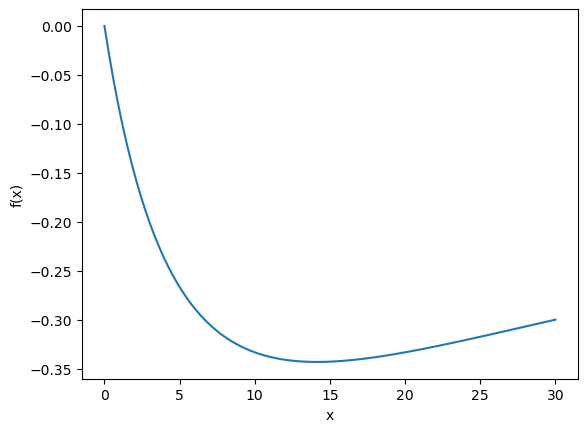

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    return -0.1 * x / ((1 + 0.05 * x) * (1 + 0.1 * x))

x_range = np.linspace(0, 30, 100)
y_range = f(x_range)

plt.plot(x_range, y_range)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### QUESTION 2 

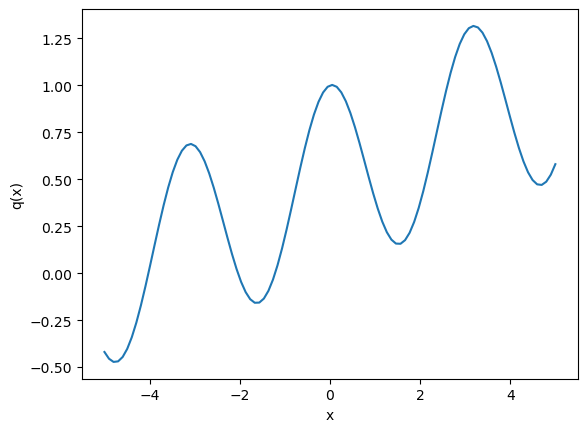

In [13]:
def q(x):
    return np.cos(x)**2 + 0.1 * x

x_range = np.linspace(-5, 5, 100)
y_range = q(x_range)

plt.plot(x_range, y_range)
plt.xlabel('x')
plt.ylabel('q(x)')
plt.show()

### QUESTION #3 

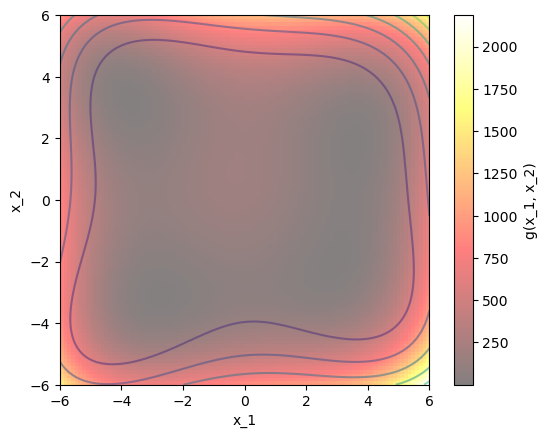

In [14]:
def g(x_1 : float , x_2 : float) -> float:    
    return (x_1**2 + x_2 - 11)**2 + (x_1 + x_2**2-7)**2

x_1_range = np.linspace(-6, 6, 100)
x_2_range = np.linspace(-6, 6, 100)

X_1, X_2 = np.meshgrid(x_1_range, x_2_range)
Y = g(X_1, X_2)

plt.contour(X_1, X_2, Y, alpha=0.5)

plt.imshow(Y, cmap='hot', extent=[-6, 6, -6, 6], alpha=0.5)
plt.colorbar(label='g(x_1, x_2)')

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

### QUESTION #4

In [44]:
import numpy as np
from typing import Callable, List



def gradient(g: Callable[[float, float], float], x: List[float], h: float = 1e-5) -> np.ndarray:
    """
    Compute the gradient of the function g at a given point x using the central difference formula.
    
    Parameters:
    g (Callable[[float, float], float]): The function for which the gradient is computed.
    x (List[float]): The point at which to compute the gradient.
    h (float, optional): The step size for central difference. Default is 1e-5.
    
    Returns:
    np.ndarray: The gradient vector at the point x.
    """
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (g(*x_forward) - g(*x_backward)) / (2 * h)
    return grad


def hessian(g: Callable[[float, float], float], x: List[float], h: float = 1e-5) -> np.ndarray:
    """
    Compute the Hessian matrix of the function g at a given point x using the central difference formula.
    
    Parameters:
    g (Callable[[float, float], float]): The function for which the Hessian is computed.
    x (List[float]): The point at which to compute the Hessian.
    h (float, optional): The step size for central difference. Default is 1e-5.
    
    Returns:
    np.ndarray: The Hessian matrix at the point x.
    """
    n = len(x)
    hess = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ij_pp = np.copy(x)
            x_ij_pm = np.copy(x)
            x_ij_mp = np.copy(x)
            x_ij_mm = np.copy(x)
            
            x_ij_pp[i] += h
            x_ij_pp[j] += h
            
            x_ij_pm[i] += h
            x_ij_pm[j] -= h
            
            x_ij_mp[i] -= h
            x_ij_mp[j] += h
            
            x_ij_mm[i] -= h
            x_ij_mm[j] -= h
            
            hess[i, j] = (g(*x_ij_pp) - g(*x_ij_pm) - g(*x_ij_mp) + g(*x_ij_mm)) / (4 * h**2)
    
    return hess

# Test the functions at the point (1, 2)
x_test: List[float] = [1.0, 2.0]

grad_g: np.ndarray = gradient(g, x_test)
hess_g: np.ndarray = hessian(g, x_test)

# Round the output to 2 decimal places
grad_g = np.round(grad_g, 2)
hess_g = np.round(hess_g, 2)

# Assert the shapes are correct
assert grad_g.shape == (2,)
assert hess_g.shape == (2, 2)

# Assert the values are correct
assert np.array_equal(grad_g, np.array([-36., -32.]))
assert np.array_equal(hess_g, np.array([[-22., 12.], [12., 26.]]))

print("Gradient at (1, 2):", grad_g)
print("Hessian at (1, 2):\n", hess_g)


Gradient at (1, 2): [-36. -32.]
Hessian at (1, 2):
 [[-22.  12.]
 [ 12.  26.]]


In [48]:
import numpy as np

def gaussian_elimination_positive_definite(A: np.ndarray) -> bool:
    """
    Determine if a given symmetric matrix A is positive definite using Gaussian elimination.
    
    Parameters:
    A (np.ndarray): The symmetric matrix to check.
    
    Returns:
    bool: True if the matrix is positive definite, False otherwise.
    """
    n = len(A)
    for i in range(n):
        # Pivot element should be positive for positive definiteness
        if A[i, i] <= 0:
            return False
        
        for j in range(i+1, n):
            # Multiplier for the row operation
            multiplier = A[j, i] / A[i, i]
            # Eliminate the element below the pivot
            A[j, i:] = A[j, i:] - multiplier * A[i, i:]
            
    # After elimination, check if all diagonal elements are positive
    return np.all(np.diag(A) > 0)

# Hessian matrix from the previous question
hessian_matrix = np.array([[-22., 12.], [12., 26.]])

assert hessian_matrix.any() == hessian_matrix.T.any()

# Check if the Hessian matrix is positive definite
is_pd = gaussian_elimination_positive_definite(hessian_matrix)

print("Is the Hessian matrix positive definite?", is_pd)


Is the Hessian matrix positive definite? False
